# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


In this project, you will use what you've learned about deep neural networks and convolutional neural networks to classify traffic signs. You will train and validate a model so it can classify traffic sign images using the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). After the model is trained, you will then try out your model on images of German traffic signs that you find on the web.


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Load the the training and testing data
training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_valid)+1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualise the dataset

Visualise the German Traffic Signs Dataset using the pickled file(s).

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualisations in Python.

List of Traffic Sign Classes:  ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles

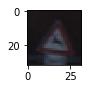

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import csv

signnames = []
classIds = []

# read signnames.csv
# https://pythonprogramming.net/reading-csv-files-python-3/
with open('signnames.csv') as csvfile:
    readCSV = csv.DictReader(csvfile)
    for row in readCSV:
        classIds.append(float(row['ClassId']))
        signnames.append(row['SignName'])

print ("List of Traffic Sign Classes: " ,signnames[:])


index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

print ("Random Traffic Sign Image-Label Verification")
print("Class Index :", index)
print("Class ID :", y_train[index])
print ("Class Name:", signnames[y_train[index]])
print ("Image Shape:", image.shape)


plt.figure(figsize=(1,1))
plt.imshow(image)



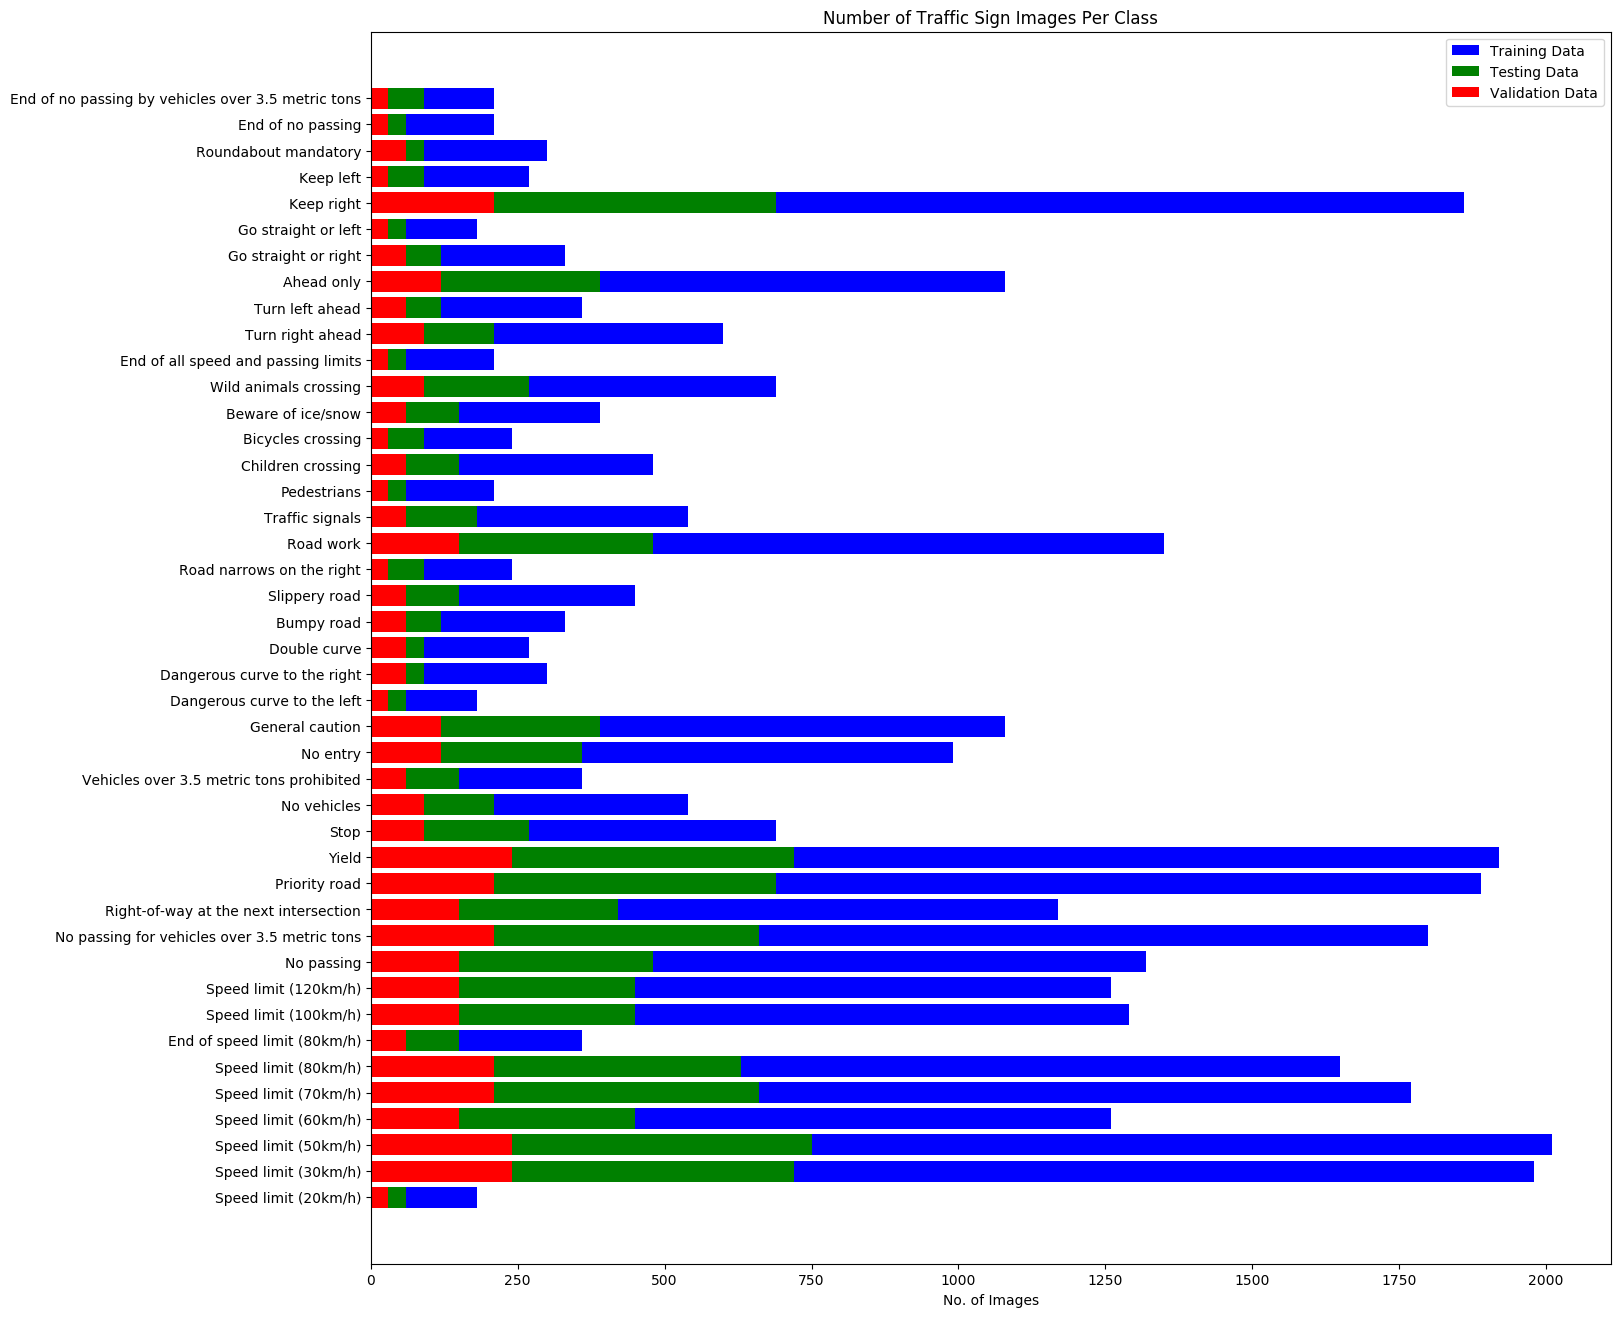

In [4]:
# http://matplotlib.org/1.5.3/examples/lines_bars_and_markers/barh_demo.html
# https://matplotlib.org/1.2.1/examples/pylab_examples/barh_demo.html

"""
Plot a horizontal bar chart showing the number of traffic signs for each class.
"""
plt.rcdefaults()
import numpy as np
from pylab import *

#train_features = np.array(train['features'])
train_labels = np.array(train['labels'])

#valid_features = np.array(valid['features'])
valid_labels = np.array(valid['labels'])

#test_features = np.array(X_test)
test_labels = np.array(y_test)


class_count = np.bincount(train_labels)
y_pos = arange(43)+.5    # centres the bar on the y axis

plt.figure(111, figsize = (16,16))
plt.barh(y_pos, class_count, align='center', label="Training Data", color='blue')#, alpha=0.9)

class_count = np.bincount(test_labels)
plt.barh(y_pos, class_count, align='center', label="Testing Data", color='green')#, alpha=0.9)

class_count = np.bincount(valid_labels)
plt.barh(y_pos, class_count, align='center', label="Validation Data", color='red')#, alpha=0.9)


plt.yticks(y_pos, signnames)
plt.legend()
plt.xlabel('No. of Images')
plt.title('Number of Traffic Sign Images Per Class')
plt.savefig('plots/data_bins.png')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognise traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson has been used as a starting point.

An initial validation accuracy of about 0.89 was acheived.

There are various aspects to consider when thinking about this problem:
- Neural network architecture (is the network over or underfitting?)
- Preprocessing techniques (normalisation, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). 

### Pre-process the Data Set (normalization, grayscale, etc.)

The images are converted to gray scale and normalised so that the data has mean zero and equal variance.

Other pre-processing steps were tested however gray scale and normalisation alone yielded highest accuracy and faster run time in comparison to RGB and various fileters such as Sharpening, Blurring, De-noise, Sobel.

Reference for
http://www.scipy-lectures.org/advanced/image_processing/

In [5]:
### TODO: I should try experiment with performing certain operations/enhancements/sharpening
###       depenging on the image quality / brightness etc 
    
import scipy
from scipy import ndimage
import random
import cv2
from sklearn import preprocessing
import numpy as np
from skimage import img_as_float

def gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def blur(image):
    return ndimage.gaussian_filter(image, sigma=1)

def sharpen(blurred_img):
    filter_blurred_f = ndimage.gaussian_filter(blurred_img, 3)
    alpha = 20
    sharpened = blurred_img + alpha * (blurred_img - filter_blurred_f)
    return sharpened

def denoise(image):
    #image = image + 0.2*image.std()*np.random.random(image.shape)
    return ndimage.median_filter(image, 1)

def edges(image):
    sx = ndimage.sobel(im, axis=0, mode='nearest')
    sy = ndimage.sobel(im, axis=1, mode='nearest')
    sob = np.hypot(sx, sy)
    return sob

# Normalizes the data between 0.1 and 0.9 instead of 0 to 255    
def normalise2(image):
    return preprocessing.scale( image, axis=0, with_mean=True, with_std=True)

def normalise(image):
    return ((image-255)/255) * 0.9 + 0.1

def clahe_normalise(image):
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
    return clahe.apply(image)
    
def equalise_histogram(image):
    return cv2.equalizeHist(image)


#### Helper Functions for Augmenting (Faking) More Data

In [6]:

def rotate(image):
    return ndimage.rotate(image, random.randint(-7,7), reshape=False)

def translate(image):
    tx = random.randint(-3,3)
    ty = random.randint(-3,3)
    translation_matrix = np.float32([[1,0,tx],[0,1,ty]])
    image = cv2.warpAffine(image,translation_matrix,(32,32))
    return image

# http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html
def shear(image):

    sx = random.randint(-3,3)
    sy = random.randint(-3,3)
    pt1 = 6+sx
    pt2 = 25+sy

    rows,cols,ch = image.shape
    pts1 = np.float32([[6,6],[25,6],[6,25]])
    pts2 = np.float32([[pt1,6],[pt2,pt1],[6,pt2]])
    
    M = cv2.getAffineTransform(pts1,pts2)
    
    return cv2.warpAffine(image,M,(cols,rows))

### Lets do some testing with our preprocessing functions and data augmentation

C:\Users\Peter\Anaconda3\envs\tensorflow-gpu35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


shape: (32, 32)
Image:  Road work


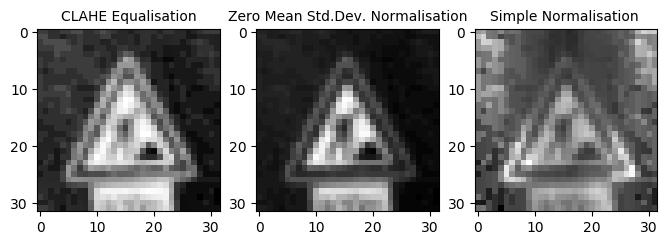

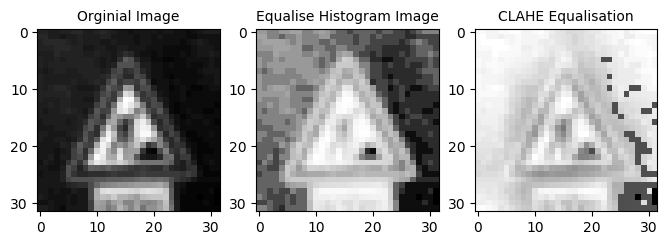

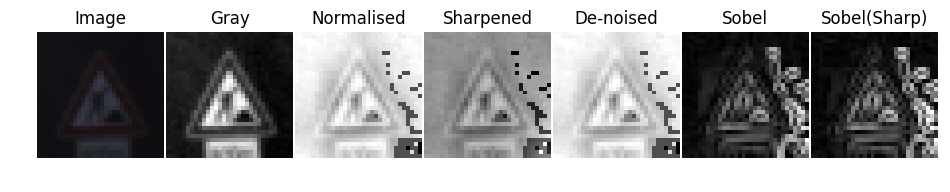

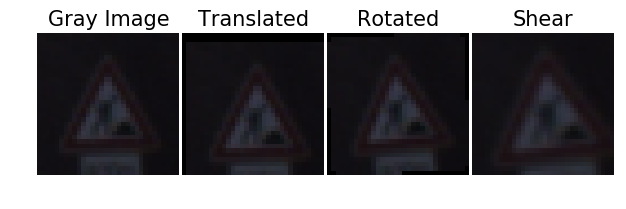

In [7]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import img_as_float

# get random index for image
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# Testing gray scale
gray_img = gray_scale(image)

#gray_img = gray_img.astype(np.uint8)
#gay_img = img_as_ubyte(gray_img)

# Testing image normalisation
plt.figure(figsize=(8,8))
plt.subplot(131)
plt.title('CLAHE Equalisation', fontsize=10)
im_normal = clahe_normalise(gray_img)
plt.imshow(im_normal, cmap=plt.cm.gray)
plt.subplot(132)
plt.title('Zero Mean Std.Dev. Normalisation', fontsize=10)
im_normal = normalise(gray_img)
plt.imshow(im_normal, cmap=plt.cm.gray)
plt.subplot(133)
plt.title('Simple Normalisation ', fontsize=10)
im_normal = normalise2(gray_img)
plt.imshow(im_normal, cmap=plt.cm.gray)

         
            
# Testing image equalise histogram
plt.figure(figsize=(8,8))
plt.subplot(131)
plt.title('Orginial Image', fontsize=10)
plt.imshow(gray_img, cmap=plt.cm.gray)
plt.subplot(132)
plt.title('Equalise Histogram Image', fontsize=10)
im_eqhist = equalise_histogram(gray_img)
plt.imshow(im_eqhist, cmap=plt.cm.gray)
plt.subplot(133) 
plt.title('CLAHE Equalisation', fontsize=10)
im_normal = clahe_normalise(im_eqhist)
plt.imshow(im_normal, cmap=plt.cm.gray)

im_normal = img_as_float(im_normal)
print("shape:", im_normal.shape)

# Testing image sharpening
sharpened = sharpen(im_normal)

# Testing denoising with median filter smoothing
med_denoised = denoise(im_normal)

# Testing edge detection with sobel on image and sharpened image
# ‘reflect’, ‘constant’, ‘nearest’, ‘mirror’, ‘wrap’}
sx = ndimage.sobel(sharpened, axis=0, mode='nearest')
sy = ndimage.sobel(sharpened, axis=1, mode='nearest')
sob = np.hypot(sx, sy)

sx = ndimage.sobel(im_normal, axis=0, mode='nearest')
sy = ndimage.sobel(im_normal, axis=1, mode='nearest')
sob2 = np.hypot(sx, sy)

# Get the image label so when I save to file I'll know what it was
img_label = ""
img_label = signnames[y_train[index]]
img_label = img_label.replace(" ", "").replace(")","").replace("(","").replace("/","").lower()

# Print the results out
print("Image: ", signnames[y_train[index]])
plt.figure(figsize=(10,10))
plt.subplot(171)
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image', fontsize=12)
plt.subplot(172)
plt.imshow(gray_img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gray', fontsize=12)
plt.subplot(173)
plt.imshow(im_normal, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Normalised', fontsize=12)
plt.subplot(174)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Sharpened', fontsize=12)
plt.subplot(175)
plt.imshow(med_denoised, cmap=plt.cm.gray)
plt.axis('off')
plt.title('De-noised', fontsize=12)
plt.subplot(176)
plt.imshow(sob2, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Sobel', fontsize=12)
plt.subplot(177)
plt.imshow(sob, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Sobel(Sharp)', fontsize=12)
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)
plt.savefig('plots/preprocessing_' + img_label + '.png')
plt.show()


# Now lets test the data augmentation
translated_img = translate(image)
rotated_img = rotate(image)
shear_img = shear(image)

# And print the results
plt.subplot(141)
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gray Image', fontsize=15)
plt.subplot(142)
plt.imshow(translated_img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Translated', fontsize=15)
plt.subplot(143)
plt.imshow(rotated_img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Rotated', fontsize=15)
plt.subplot(144)
plt.imshow(shear_img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Shear', fontsize=15)
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)
plt.savefig('plots/augmentations_' + img_label + '.png')
plt.show()



### Testing looks good, lets create pipeline for pre-processing images


In [8]:
### Preprocess the data here. It is required to normalise the data. 
### Other preprocessing steps could include 
### converting to grayscale, etc.

from sklearn import preprocessing
import numpy as np
import cv2

# Convert Iterates through grayscale for each image in the data
def preprocess(data):
    if data.shape[3] == 3:
        processed_images = []
        for image in data:
            image = gray_scale(image)
            image = equalise_histogram(image)
            image = clahe_normalise(image)
            image = img_as_float(image)
            image = sharpen(image)
            #image = denoise(image)
            #image = edges(image)
            processed_images.append(image)
        return np.array(processed_images)
    else:
        print("ERROR: Wrong shape, expecting RGB images")


### And now lets run the pre-processing on our data sets
We should also make sure that the shapes are right

Preprocessing training data...
Processed training data shape = (34799, 32, 32, 1)
Finished preprocessing training data.
Preprocessing validation data...
Processed validation data shape = (4410, 32, 32, 1)
Finished preprocessing validation data.
Preprocessing testing data...
Processed testing data shape = (12630, 32, 32, 1)
Finished preprocessing testing data.
X_train.shape (34799, 32, 32, 1)
X_valid.shape (4410, 32, 32, 1)
X_test.shape (12630, 32, 32, 1)
All data preprocessing complete.

Printing processed image:  Keep right


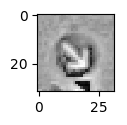

In [9]:
from numpy import newaxis

print('Preprocessing training data...')
# Convert training images to grayscale
X_train = preprocess(X_train)
X_train = X_train[..., newaxis]
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
# Double-check that the image is changed to depth of 1
print("Processed training data shape =", X_train.shape)
print('Finished preprocessing training data.')

print('Preprocessing validation data...')
# Convert test images to gray scale
X_valid = preprocess(X_valid)
X_valid = X_valid[..., newaxis]
print("Processed validation data shape =", X_valid.shape)
print('Finished preprocessing validation data.')

print('Preprocessing testing data...')
# Convert test images to gray scale
X_test = preprocess(X_test)
X_test = X_test[..., newaxis]
print("Processed testing data shape =", X_test.shape)
print('Finished preprocessing testing data.')

# Double check the data shapes
print ("X_train.shape",X_train.shape)
print ("X_valid.shape",X_valid.shape)
print ("X_test.shape",X_test.shape)
print('All data preprocessing complete.')

print()

print("Printing processed image: ",signnames[y_train[index]])
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')


Printing processed image:  Turn left ahead


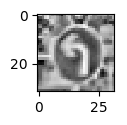

In [10]:
#Can test a few more images here 
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
print("Printing processed image: ",signnames[y_train[index]])
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')

### Augmentation Pipeline
Great, images are processed, but we some labels still don't have many images for some of the labels. Lets make the data augmentation pipeline. We will genereate fake data using somewhat random rotations, translations and and shear transforms.

In [11]:
import random
print("Class Count: ", class_count)
#class_id = 0
required_images = 5000
class_count = np.bincount(train_labels)
print(class_count.shape[0])

for class_id in range(class_count.shape[0]):
    new_images = []
    new_labels = []
    
    images_in_class = class_count[class_id]
    diff = required_images - images_in_class
    if diff <=0:
        continue
    else:
        while  diff >= 1:
            print("Class No. ", class_id, "with ", class_count[class_id], " images requires ", diff, " augmented images")
            # do some operations and append to training set until we have required no. of images
            image_no = 0

            for image in X_train: # step through all the images 
                if (y_train[image_no] == class_id): #if the image is in our current class of interest
                    
                    if diff < 1:
                        continue # we have enought images
                        
                    # otherwise we have found an image to augment
                    diff = diff-1
                    # lets start with a rotation
                    image = rotate(image)
                    # apply a translation
                    image = translate(image)
                    image = np.expand_dims(image, axis=2) # if using rgb remove this line.
                    # and finish with shear transformation
                    image = shear(image)
                    image = np.expand_dims(image, axis=2) # if using rgb remove this line.
                    # save our new image to a temporary list
                    new_images.append(image)
                    new_labels.append(class_id)
                    
                    
                
                image_no = image_no+1
                
            
                        
        # only after we have enough augmented data do we add the new images to our training set
        # otherwise we might perform toooo many transformations on the data
        X_train = np.concatenate((X_train, np.array(new_images)), axis=0) 
        y_train = np.concatenate((y_train, np.array(new_labels)), axis=0)
        
print("Data augmentation complete")
      

Class Count:  [ 30 240 240 150 210 210  60 150 150 150 210 150 210 240  90  90  60 120
 120  30  60  60  60  60  30 150  60  30  60  30  60  90  30  90  60 120
  60  30 210  30  60  30  30]
43
Class No.  0 with  180  images requires  4820  augmented images
Class No.  0 with  180  images requires  4640  augmented images
Class No.  0 with  180  images requires  4460  augmented images
Class No.  0 with  180  images requires  4280  augmented images
Class No.  0 with  180  images requires  4100  augmented images
Class No.  0 with  180  images requires  3920  augmented images
Class No.  0 with  180  images requires  3740  augmented images
Class No.  0 with  180  images requires  3560  augmented images
Class No.  0 with  180  images requires  3380  augmented images
Class No.  0 with  180  images requires  3200  augmented images
Class No.  0 with  180  images requires  3020  augmented images
Class No.  0 with  180  images requires  2840  augmented images
Class No.  0 with  180  images requires

Class No.  19 with  180  images requires  2120  augmented images
Class No.  19 with  180  images requires  1940  augmented images
Class No.  19 with  180  images requires  1760  augmented images
Class No.  19 with  180  images requires  1580  augmented images
Class No.  19 with  180  images requires  1400  augmented images
Class No.  19 with  180  images requires  1220  augmented images
Class No.  19 with  180  images requires  1040  augmented images
Class No.  19 with  180  images requires  860  augmented images
Class No.  19 with  180  images requires  680  augmented images
Class No.  19 with  180  images requires  500  augmented images
Class No.  19 with  180  images requires  320  augmented images
Class No.  19 with  180  images requires  140  augmented images
Class No.  20 with  300  images requires  4700  augmented images
Class No.  20 with  300  images requires  4400  augmented images
Class No.  20 with  300  images requires  4100  augmented images
Class No.  20 with  300  image

Class No.  28 with  480  images requires  4520  augmented images
Class No.  28 with  480  images requires  4040  augmented images
Class No.  28 with  480  images requires  3560  augmented images
Class No.  28 with  480  images requires  3080  augmented images
Class No.  28 with  480  images requires  2600  augmented images
Class No.  28 with  480  images requires  2120  augmented images
Class No.  28 with  480  images requires  1640  augmented images
Class No.  28 with  480  images requires  1160  augmented images
Class No.  28 with  480  images requires  680  augmented images
Class No.  28 with  480  images requires  200  augmented images
Class No.  29 with  240  images requires  4760  augmented images
Class No.  29 with  240  images requires  4520  augmented images
Class No.  29 with  240  images requires  4280  augmented images
Class No.  29 with  240  images requires  4040  augmented images
Class No.  29 with  240  images requires  3800  augmented images
Class No.  29 with  240  im

Class No.  37 with  180  images requires  2120  augmented images
Class No.  37 with  180  images requires  1940  augmented images
Class No.  37 with  180  images requires  1760  augmented images
Class No.  37 with  180  images requires  1580  augmented images
Class No.  37 with  180  images requires  1400  augmented images
Class No.  37 with  180  images requires  1220  augmented images
Class No.  37 with  180  images requires  1040  augmented images
Class No.  37 with  180  images requires  860  augmented images
Class No.  37 with  180  images requires  680  augmented images
Class No.  37 with  180  images requires  500  augmented images
Class No.  37 with  180  images requires  320  augmented images
Class No.  37 with  180  images requires  140  augmented images
Class No.  38 with  1860  images requires  3140  augmented images
Class No.  38 with  1860  images requires  1280  augmented images
Class No.  39 with  270  images requires  4730  augmented images
Class No.  39 with  270  ima

#### Lets check how many images we have per traffic sign label now

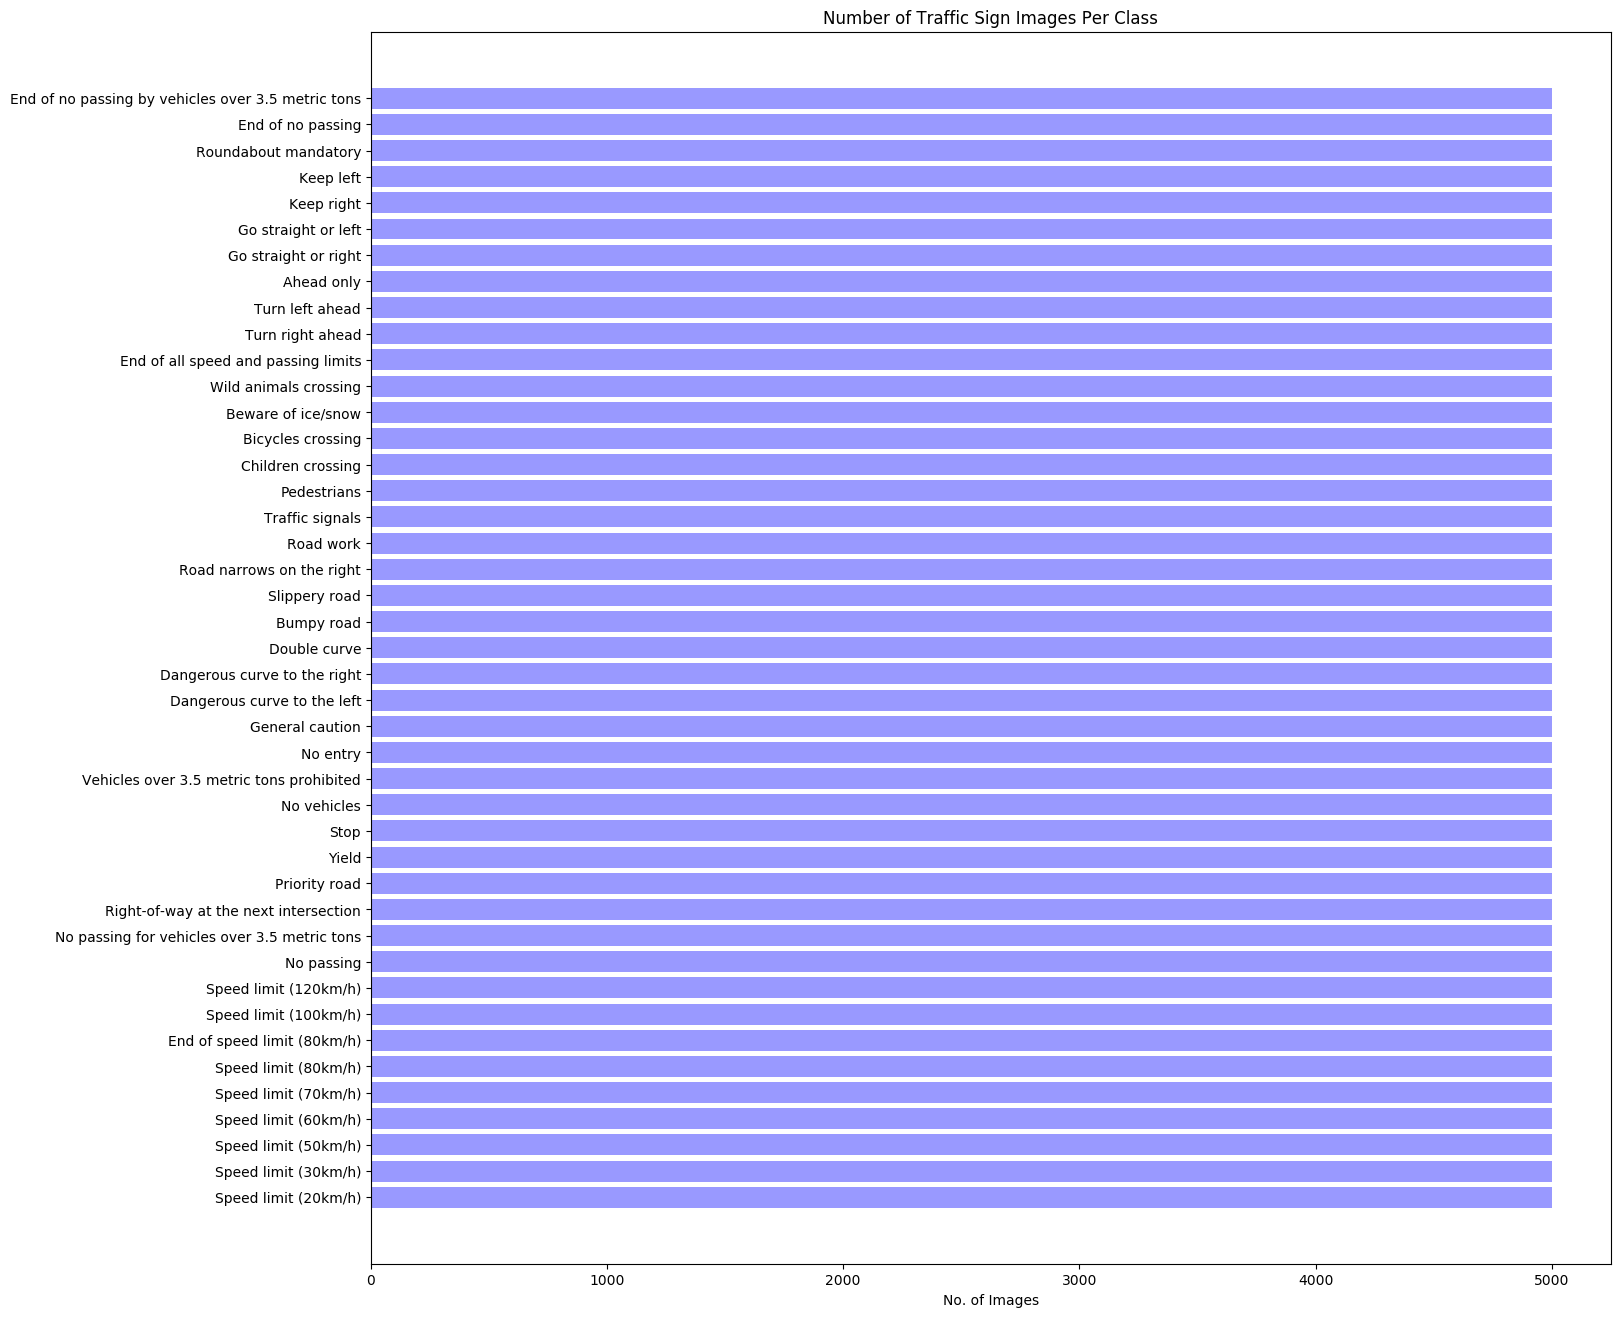

In [12]:
# http://matplotlib.org/1.5.3/examples/lines_bars_and_markers/barh_demo.html
# https://matplotlib.org/1.2.1/examples/pylab_examples/barh_demo.html

"""
Plot a horizontal bar chart showing the number of traffic signs for each class.
"""
plt.rcdefaults()
import numpy as np
from pylab import *

class_count = np.bincount(y_train)
y_pos = arange(43)+.5    # centres the bar on the y axis

figure(111, figsize = (16,16))
barh(y_pos, class_count, align='center', color='blue', alpha=0.4)
yticks(y_pos, signnames)
xlabel('No. of Images')
title('Number of Traffic Sign Images Per Class')
plt.savefig('plots/augmented_data_bins.png')
show()

### Shuffle the training data.

In [13]:
#import sklearn
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

# TODO: use StratifiedShuffleSplit

#from sklearn.model_selection import StratifiedShuffleSplit

#sss = StratifiedShuffleSplit(n_splits=10, test_size=0.01, random_state=0)
#sss.get_n_splits(X_train, y_train)

#for train_index, test_index in sss.split(X_train, y_train):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X_train[train_index], X_train[test_index]
#    y_train, y_test = y_train[train_index], y_train[test_index]

### Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [14]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128 
# I found that learning jumped around a lot at lower batch sizes, 
# increasing helped smooth the learning curve and increased speed

conv1_activation = None
conv2_activation = None
conv3_activation = None
conv4_activation = None
conv5_activation = None
conv6_activation = None
conv7_activation = None
conv8_activation = None

## Model Architecture

Layer 1: Convolutional


## Inception Model

In [15]:
### This inception model was inspired by a couple layers from Inception V4
### I've implemented two layers - accuracy at about 80% perhaps it could be deeper
### It needs to have the right learning rate else it wont learn
### When it does learn it overfits
### https://arxiv.org/pdf/1602.07261.pdf

import numpy as np
from tensorflow.contrib.layers import flatten

def inceptionV4_2L(x):
    global conv1_activation, conv2_activation
    
    mu = 0
    sigma = 0.1
    
    in_height = image_shape[0]
    in_width = image_shape[1]
    depth_in = image_shape[2]

    padding_type = 'SAME'
    
    ### layer 1 - 1x1 filter
    depth_in = 1
    filter_size = 1
    depth_out1x1 = 8
    stride_size = 1
    conv1x1_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out1x1), mean = mu, stddev = sigma))
    conv1x1_b = tf.Variable(tf.zeros(depth_out1x1))
    conv1x1   = tf.nn.conv2d(x, conv1x1_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv1x1_b
    out_height1x1a = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    
    # SOLUTION: Activation.
    conv1_activation = conv1x1 = tf.nn.relu(conv1x1)
    
    ### layer 2 - 3x3 filter
    depth_in = depth_out1x1
    filter_size = 3
    depth_out3x3 = 8
    stride_size = 1
    conv3x3_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out3x3), mean = mu, stddev = sigma))
    conv3x3_b = tf.Variable(tf.zeros(depth_out3x3))
    conv3x3   = tf.nn.conv2d(conv1x1, conv3x3_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv3x3_b
    out_height3x3 = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width3x3  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
    
    # SOLUTION: Activation.
    conv2_activation = conv3x3 = tf.nn.relu(conv3x3)
    
    ### layer 3 - local_response_normalization
    conv3x3 = tf.nn.lrn(conv3x3, depth_radius=5, bias=2, alpha=1e-4, beta=0.75)
    
    # layer 4 - max pooling 3x3 
    pool_kernal = 3
    pool_stride = 1
    pool0 = tf.nn.max_pool(conv3x3, ksize=[1, pool_kernal, pool_kernal, 1], strides=[1, pool_stride, pool_stride, 1], padding=padding_type)
    out_height_pool = np.ceil(float(in_height - pool_kernal) / float(pool_stride)+1)
    out_width_pool  = np.ceil(float(in_width - pool_kernal ) / float(pool_stride)+1)
    
    # SOLUTION: Activation.
    #pool0 = tf.nn.relu(pool0)
    
    # layer 5 - Inception Sub Layer 1 - 1x1
    depth_in = int(pool0[1].shape[2])
    filter_size = 1
    depth_out1x1a = 8
    stride_size = 1
    conv1x1a_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out1x1a), mean = mu, stddev = sigma))
    conv1x1a_b = tf.Variable(tf.zeros(depth_out1x1a))
    conv1x1a   = tf.nn.conv2d(pool0, conv1x1a_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv1x1a_b
    out_height1x1a = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    
    # SOLUTION: Activation.
    conv1x1a = tf.nn.relu(conv1x1a)
    
    # layer 5 - Inception Sub Layer 1 - 3x3
    depth_in3x3a = int(conv1x1a[1].shape[2])
    filter_size = 3
    depth_out3x3a = 8
    stride_size = 2
    conv3x3a_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in3x3a, depth_out3x3a), mean = mu, stddev = sigma))
    conv3x3a_b = tf.Variable(tf.zeros(depth_out3x3a))
    conv3x3a   = tf.nn.conv2d(conv1x1a, conv3x3a_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv3x3a_b
    out_height3x3a = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width3x3a  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
    
    # SOLUTION: Activation.
    conv3x3a = tf.layers.dropout(conv3x3a, keep_prob_conv)
    conv3x3a = tf.nn.relu(conv3x3a)

    # layer 5 - Inception Sub Layer 2 - 1x1
    depth_in = int(pool0[1].shape[2])
    filter_size = 1
    depth_out1x1b = 8
    stride_size = 1
    conv1x1b_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out1x1b), mean = mu, stddev = sigma))
    conv1x1b_b = tf.Variable(tf.zeros(depth_out1x1b))
    conv1x1b   = tf.nn.conv2d(pool0, conv1x1b_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv1x1b_b
    out_height1x1b = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width1x1b  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
    
    # SOLUTION: Activation.
    conv1x1b = tf.nn.relu(conv1x1b)
    
    # layer 5 - Inception Sub Layer 2 - 3x3
    depth_in5x5c = int(conv1x1b[1].shape[2])
    filter_size = 5
    depth_out5x5c = 8
    stride_size = 2
    conv5x5c_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in5x5c, depth_out5x5c), mean = mu, stddev = sigma))
    conv5x5c_b = tf.Variable(tf.zeros(depth_out5x5c))
    conv5x5c   = tf.nn.conv2d(conv1x1b, conv5x5c_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv5x5c_b
    out_height5x5c = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width5x5c  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
    
    # SOLUTION: Activation.
    conv5x5c = tf.layers.dropout(conv5x5c, keep_prob_conv)
    conv5x5c = tf.nn.relu(conv5x5c)
    
    # layer 5 - Inception Sub Layer 3 - max pool
    pool_kernal = 3
    pool_stride = 2
    pool1 = tf.nn.max_pool(pool0, ksize=[1, pool_kernal, pool_kernal, 1], strides=[1, pool_stride, pool_stride, 1], padding=padding_type)
    out_height_pool = np.ceil(float(in_height - pool_kernal) / float(pool_stride)+1)
    out_width_pool  = np.ceil(float(in_width - pool_kernal ) / float(pool_stride)+1)
    #print(" out_height3x3c: ", out_height3x3c )
    #print(" out_width3x3c: ", out_width3x3c )
    #print("Shape pool: ", pool.shape )
    
    # SOLUTION: Activation.
    pool1 = tf.nn.relu(pool1)
    pool1_depth = int(pool1[1].shape[2])
    
    # layer 5 - Inception Sub Layer 4 - 1x1
    depth_in = int(pool0[1].shape[2])
    filter_size = 1
    depth_out1x1d = 8
    stride_size = 1
    conv1x1d_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out1x1d), mean = mu, stddev = sigma))
    conv1x1d_b = tf.Variable(tf.zeros(depth_out1x1d))
    conv1x1d   = tf.nn.conv2d(pool0, conv1x1d_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv1x1d_b
    out_height1x1d = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width1x1d  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
    
    # SOLUTION: Activation.
    conv1x1d = tf.nn.relu(conv1x1d)
    
    # layer 5 - Inception Sub Layer 4 - 3x3
    depth_in = int(conv1x1d[1].shape[2])
    filter_size = 3
    depth_out3x3d = 8
    stride_size = 2
    conv3x3d_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out3x3d), mean = mu, stddev = sigma))
    conv3x3d_b = tf.Variable(tf.zeros(depth_out3x3d))
    conv3x3d   = tf.nn.conv2d(conv1x1d, conv3x3d_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv3x3d_b
    out_height3x3d = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width3x3d  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))

    # SOLUTION: Activation.
    conv3x3d = tf.layers.dropout(conv3x3d, keep_prob_conv)
    conv3x3d = tf.nn.relu(conv3x3d)
    
    conv = tf.concat([conv3x3a, conv5x5c, pool1, conv3x3d], axis=3)  # Concat in the 4th dim (axis=3) to stack

    # SOLUTION: Activation.
    conv = tf.nn.relu(conv)
   
    ########################
    # NEXT INCEPTION LAYER #
    ########################
    
    filter_size = 1
    depth_in = int(conv[1].shape[2])
    depth_out1x1a2 = 8
    stride_size = 1
    conv1x1a_W2 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out1x1a2), mean = mu, stddev = sigma))
    conv1x1a_b2 = tf.Variable(tf.zeros(depth_out1x1a2))
    conv1x1a2   = tf.nn.conv2d(conv, conv1x1a_W2, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv1x1a_b2
    out_height1x1a2 = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width1x1a2  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
   
    # SOLUTION: Activation.
    conv1x1a2 = tf.nn.relu(conv1x1a2)
    
    depth_in3x3a2 = int(conv1x1a2[1].shape[2])
    filter_size = 3
    depth_out3x3a2 = 8
    stride_size = 1
    conv3x3a_W2 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in3x3a2, depth_out3x3a2), mean = mu, stddev = sigma))
    conv3x3a_b2 = tf.Variable(tf.zeros(depth_out3x3a2))
    conv3x3a2   = tf.nn.conv2d(conv1x1a2, conv3x3a_W2, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv3x3a_b2
    out_height3x3a2 = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width3x3a2  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))

    
    # SOLUTION: Activation.
    conv3x3a2 = tf.nn.relu(conv3x3a2)
    
    depth_in3x3b2 = int(conv3x3a2[1].shape[2])
    filter_size = 3
    depth_out3x3b2 = 8
    stride_size = 2
    conv3x3b_W2 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in3x3b2, depth_out3x3b2), mean = mu, stddev = sigma))
    conv3x3b_b2 = tf.Variable(tf.zeros(depth_out3x3b2))
    conv3x3b2   = tf.nn.conv2d(conv3x3a2, conv3x3b_W2, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv3x3b_b2
    out_height3x3b2 = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width3x3b2  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
   
    # SOLUTION: Activation.
    conv3x3b2 = tf.nn.relu(conv3x3b2)
    
    depth_in = int(conv[1].shape[2])
    filter_size = 1
    depth_out1x1b2 = 8
    stride_size = 1
    conv1x1b_W2 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out1x1b2), mean = mu, stddev = sigma))
    conv1x1b_b2 = tf.Variable(tf.zeros(depth_out1x1b2))
    conv1x1b2   = tf.nn.conv2d(conv, conv1x1b_W2, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv1x1b_b2
    out_height1x1b2 = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width1x1b2  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
   
    # SOLUTION: Activation.
    conv1x1b2 = tf.nn.relu(conv1x1b2)
    
    depth_in3x3c2 = int(conv1x1b2[1].shape[2])
    filter_size = 3
    depth_out3x3c2 = 8
    stride_size = 2
    conv3x3c_W2 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in3x3c2, depth_out3x3c2), mean = mu, stddev = sigma))
    conv3x3c_b2 = tf.Variable(tf.zeros(depth_out3x3c2))
    conv3x3c2   = tf.nn.conv2d(conv1x1b2, conv3x3c_W2, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv3x3c_b2
    out_height3x3c2 = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width3x3c2  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
    
    # SOLUTION: Activation.
    conv3x3c2 = tf.nn.relu(conv3x3c2)
    
    pool_kernal = 3
    pool_stride = 2
    pool2 = tf.nn.max_pool(conv, ksize=[1, pool_kernal, pool_kernal, 1], strides=[1, pool_stride, pool_stride, 1], padding=padding_type)
    out_height_pool2 = np.ceil(float(in_height - pool_kernal) / float(pool_stride)+1)
    out_width_pool2  = np.ceil(float(in_width - pool_kernal ) / float(pool_stride)+1)
   
    # SOLUTION: Activation.
    pool2 = tf.nn.relu(pool2)
    pool2_depth = int(pool2[1].shape[2])
    
    depth_in = int(conv[1].shape[2])
    filter_size = 1
    depth_out1x1d2 = 8
    stride_size = 1
    conv1x1d_W2 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out1x1d2), mean = mu, stddev = sigma))
    conv1x1d_b2 = tf.Variable(tf.zeros(depth_out1x1d2))
    conv1x1d2   = tf.nn.conv2d(conv, conv1x1d_W2, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv1x1d_b2
    out_height1x1d2 = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width1x1d2  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
   
    # SOLUTION: Activation.
    conv1x1d2 = tf.nn.relu(conv1x1d2)
    
    # Inception Sub Layer - 3x3
    depth_in = int(conv1x1d2[1].shape[2])
    filter_size = 3
    depth_out3x3d2 = 8
    stride_size = 2
    conv3x3d_W2 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out3x3d2), mean = mu, stddev = sigma))
    conv3x3d_b2 = tf.Variable(tf.zeros(depth_out3x3d2))
    conv3x3d2   = tf.nn.conv2d(conv1x1d2, conv3x3d_W2, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv3x3d_b2
    out_height3x3d2 = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width3x3d2  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
    #print(" out_height1x1d: ", out_height1x1d )
    #print(" out_width1x1d: ", out_width1x1d )
    #print("Shape conv1x1d: ", conv1x1d.shape )
    
    # SOLUTION: Activation.
    conv3x3d2 = tf.nn.relu(conv3x3d2)
    
    conv2 = tf.concat([conv3x3b2, conv3x3c2, pool2, conv3x3d2], axis=3)  # Concat in the 4th dim (axis=3) to stack
    
    ###########################
    # END OF INCEPTION LAYERS #
    ###########################
    
   
    # apply DropOut
    #conv2 = tf.nn.dropout(conv2, keep_prob)
  
    # SOLUTION: Activation.
    conv2 =  tf.nn.relu(conv2)
   
    # SOLUTION: Pooling. 
    input_height = int(conv2[1].shape[0])
    input_width = int(conv2[1].shape[1])
    depth = int(conv2[1].shape[2])
    pool_kernal = 2
    pool_stride = 2
    conv3 = tf.nn.max_pool(conv2, ksize=[1, pool_kernal, pool_kernal, 1], strides=[1, pool_stride, pool_stride, 1], padding=padding_type)
    out_height = np.ceil(float(in_height - pool_kernal + 1) / float(pool_stride))
    out_width  = np.ceil(float(in_width - pool_kernal + 1) / float(pool_stride))
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    filter_size = 3
    depth_in = int(conv3[1].shape[2])
    depth_out4 = 32
    stride_size = 1
    conv4_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out4), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(depth_out4))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv4_b
    out_height4 = np.ceil(float(in_height - filter_size + 1) / float(stride_size))
    out_width4  = np.ceil(float(in_width - filter_size + 1) / float(stride_size))
    depth = int(conv2[1].shape[2])
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4)
   
    # SOLUTION: Pooling. 
    pool_kernal = 3
    pool_stride = 2
    conv5 = tf.nn.max_pool(conv4, ksize=[1, pool_kernal, pool_kernal, 1], strides=[1, pool_stride, pool_stride, 1], padding=padding_type)
    out_height = np.ceil(float(in_height - pool_kernal + 1) / float(pool_stride))
    out_width  = np.ceil(float(in_width - pool_kernal + 1) / float(pool_stride))
    
    # SOLUTION: Activation.
    conv5 = tf.nn.relu(conv5)

    depth_in = int(conv5[1].shape[2])
    size = int(conv5[1].shape[0])
    
    # Dense Layer
    conv5 = tf.reshape(conv5, [-1, depth_in*size*size])  
    dense = tf.layers.dense(inputs=conv5, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(dense, keep_prob) #, training=True)
    
    # SOLUTION: Flatten.
    fc0   = flatten(dropout)
    # SOLUTION: Layer 3: Fully Connected.
    depth_in = int(fc0[1].shape[0])
    depth_out = 160
    fc1_W = tf.Variable(tf.truncated_normal(shape=(depth_in, depth_out), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(depth_out))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 160. Output = 84.
    depth_in = depth_out
    depth_out = 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(depth_in, depth_out), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(depth_out))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    dropout = tf.layers.dropout(fc2, keep_prob) #, training=True)
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(dropout)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    depth_in = depth_out
    depth_out = n_classes
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(depth_in, depth_out), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(depth_out))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


## LeTrafficNet
Began as LeNet - now its LeTrafficNet
Tried using variuous combinations of 3x3 and 5x5 kernels with various depths. 5x5 generally seems better, 7x7 didn't have any improvements. Currently at 96%

In [16]:
import numpy as np
from tensorflow.contrib.layers import flatten

def LeTrafficNet(x):    
    global conv1_activation, conv2_activation, conv3_activation, conv4_activation
    
    mu = 0
    sigma = 0.1
    
    image_shape = X_train[0].shape
    in_height = image_shape[0]
    in_width = image_shape[1]
    depth_in = image_shape[2]

    padding_type = 'VALID'
    
    
    # SOLUTION: Layer 1: Convolutional.
    filter_size = 3
    depth_out = 6
    stride_size = 1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(depth_out))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv1_b
    
    #dropout = tf.layers.dropout(inputs=conv1, rate=keep_prob_conv)
    
    # SOLUTION: Activation.
    conv1_activation = conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling.
    pool_kernal = 2
    pool_stride = 2
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, pool_kernal, pool_kernal, 1], strides=[1, pool_stride, pool_stride, 1], padding=padding_type)

    # SOLUTION: Layer 2: Convolutional.
    depth_in = int(conv1[1].shape[2])
    filter_size = 5
    depth_out = 16
    stride_size = 1
    conv2_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(depth_out))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv2_b
    
    #dropout = tf.layers.dropout(inputs=conv2, rate=keep_prob_conv)
    
    # SOLUTION: Activation.
    conv2_activation = conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling.
    pool_kernal = 2
    pool_stride = 2
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, pool_kernal, pool_kernal, 1], strides=[1, pool_stride, pool_stride, 1], padding=padding_type)
    
    dropout = tf.layers.dropout(inputs=conv2, rate=keep_prob_conv)
    
    # SOLUTION: Layer 3: Convolutional.
    depth_in = int(conv2[1].shape[2])
    filter_size = 5
    depth_out = 32
    stride_size = 1
    conv3_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(depth_out))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv3_b
    
    # SOLUTION: Activation.
    conv3_activation = conv3 = tf.nn.relu(conv3)

    # Dense Layer
    depth_in = int(conv3[1].shape[2])
    size = int(conv3[1].shape[0])
    dense = tf.reshape(conv3, [-1, depth_in*size*size]) 
    dense = tf.layers.dense(inputs=dense, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(inputs=dense, rate=keep_prob_conv)
    
    # SOLUTION: Flatten. 
    fc0   = flatten(dropout)
     
    # SOLUTION: Layer 4: Fully Connected. 
    depth_in = int(fc0[1].shape[0])
    depth_out = 500
    fc1_W = tf.Variable(tf.truncated_normal(shape=(depth_in, depth_out), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(depth_out))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    conv4_activation = fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 5: Fully Connected.
    depth_in = int(fc1[1].shape[0])
    depth_out = 300
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(depth_in, depth_out), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(depth_out))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    dropout = tf.layers.dropout(inputs=fc2, rate=keep_prob)
    
    # SOLUTION: Activation.
    fc2 = tf.nn.relu(dropout)

    # SOLUTION: Layer 5: Fully Connected.
    depth_in = int(fc2[1].shape[0])
    depth_out = n_classes
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(depth_in, depth_out), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(depth_out))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


#### Another Inception Model
But this time just one inception layer, with more depth, so that it trains much faster, currently at ~98% accuracy


In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import numpy as np
from tensorflow.contrib.layers import flatten


def inception_1L(x):    
    global conv1_activation, conv2_activation, conv3_activation, conv4_activation, conv5_activation, conv6_activation, conv7_activation, conv8_activation
    
    mu = 0
    sigma = 0.1
    
    image_shape = X_train[0].shape
    in_height = image_shape[0]
    in_width = image_shape[1]
    depth_in = image_shape[2]

    padding_type = 'SAME'
    
    
    # SOLUTION: Layer 0: Convolutional. Input = 32x32x3. Output = 26x26x16.
    filter_size = 1
    depth_out = 3
    stride_size = 1
    conv0_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(depth_out))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv0_b
    
    #dropout = tf.layers.dropout(inputs=conv1, rate=keep_prob_conv)
    
    # SOLUTION: Activation.
    conv1_activation = conv0 = tf.nn.relu(conv0)
    
    # SOLUTION: Layer 1: Convolutional. Output = 9x9x32.
    depth_in = int(conv0[1].shape[2]) 
    filter_size = 5
    depth_out = 32
    stride_size = 1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(depth_out))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv1_b
    
     # SOLUTION: Activation.
    conv2_activation = conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Layer 2: Convolutional.
    depth_in = int(conv1[1].shape[2]) 
    filter_size = 5
    depth_out = 32
    stride_size = 1
    conv2_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(depth_out))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv2_b
    
    conv4_activation = conv2 = tf.layers.dropout(inputs=conv2, rate=keep_prob_conv)
    
    # SOLUTION: Activation.
    conv3_activation = conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling.
    pool_kernal = 2
    pool_stride = 2
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, pool_kernal, pool_kernal, 1], strides=[1, pool_stride, pool_stride, 1], padding=padding_type)
    
    # SOLUTION: Dropout.
    conv2 = tf.layers.dropout(inputs=conv2, rate=keep_prob_conv)
    
    # SOLUTION: Layer 3: Convolutional.
    depth_in = int(conv2[1].shape[2]) 
    filter_size = 5
    depth_out = 64
    stride_size = 1
    conv3_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(depth_out))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv3_b

    # SOLUTION: Activation.
    conv5_activation = conv3 = tf.nn.relu(conv3)

    # SOLUTION: Layer 4: Convolutional.
    depth_in = int(conv3[1].shape[2]) 
    filter_size = 5
    depth_out = 64
    stride_size = 1
    conv4_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(depth_out))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv4_b
    
    # SOLUTION: Activation.
    conv6_activation = conv4 = tf.nn.relu(conv4)
    
    # SOLUTION: Pooling.
    pool_kernal = 2
    pool_stride = 2
    conv4 = tf.nn.avg_pool(conv4, ksize=[1, pool_kernal, pool_kernal, 1], strides=[1, pool_stride, pool_stride, 1], padding=padding_type)
    
    # SOLUTION: Dropout.
    conv4 = tf.layers.dropout(inputs=conv4, rate=keep_prob_conv)
    
    
    # SOLUTION: Layer 3: Convolutional.
    depth_in = int(conv4[1].shape[2]) 
    filter_size = 5
    depth_out = 128
    stride_size = 1
    conv5_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(depth_out))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv5_b

    # SOLUTION: Activation.
    conv7_activation = conv5 = tf.nn.relu(conv5)

    # SOLUTION: Layer 4: Convolutional.
    depth_in = int(conv5[1].shape[2]) 
    filter_size = 5
    depth_out = 128
    stride_size = 1
    conv6_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth_in, depth_out), mean = mu, stddev = sigma))
    conv6_b = tf.Variable(tf.zeros(depth_out))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, stride_size, stride_size, 1], padding=padding_type) + conv6_b
    
    # SOLUTION: Activation.
    conv8_activation = conv6 = tf.nn.relu(conv6)
    
    # SOLUTION: Pooling. 
    pool_kernal = 2
    pool_stride = 2
    conv6 = tf.nn.avg_pool(conv6, ksize=[1, pool_kernal, pool_kernal, 1], strides=[1, pool_stride, pool_stride, 1], padding=padding_type)
    
    # SOLUTION: Dropout.
    conv6 = tf.layers.dropout(inputs=conv6, rate=keep_prob_conv)   
    
    flat2   = flatten(conv2)
    flat4   = flatten(conv4)
    flat6   = flatten(conv6)
    
    flat_layer = tf.concat([flat2, flat4, flat6], axis=1)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 160. Output = 160.
    depth_in = int(flat_layer[1].shape[0]) 
    depth_out = 1024
    fc0_W = tf.Variable(tf.truncated_normal(shape=(depth_in, depth_out), mean = mu, stddev = sigma))
    fc0_b = tf.Variable(tf.zeros(depth_out))
    fc0   = tf.matmul(flat_layer, fc0_W) + fc0_b
    
    # SOLUTION: Activation.
    fc0    = tf.nn.relu(fc0)
    fc0 = tf.layers.dropout(inputs=fc0, rate=keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected.
    depth_in = int(fc0[1].shape[0]) 
    depth_out = 1024
    fc1_W = tf.Variable(tf.truncated_normal(shape=(depth_in, depth_out), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(depth_out))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.layers.dropout(inputs=fc1, rate=keep_prob)

    # SOLUTION: Layer 5: Fully Connected.
    depth_in = int(fc1[1].shape[0])
    depth_out = n_classes
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(depth_in, depth_out), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(depth_out))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits


### Features and Labels
Train model to classify images

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [18]:
image_shape = X_train[0].shape
print("Xtrain Image Shape", image_shape)
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # Source: https://stackoverflow.com/questions/40879504/how-to-apply-drop-out-in-tensorflow-to-improve-the-accuracy-of-neural-network
keep_prob_conv = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)


Xtrain Image Shape (32, 32, 1)


## Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Train
Training pipeline that uses the model to classify data

Here the adam optimiser is used, it has an adaptive learning rate for useful for fast convergence and training on deep or complex neural networks

In [19]:
# a few different learning rates
#rate = 0.001 # quick testing
rate = 0.0003 #LeTrafficNet, inception_1L
#rate = 0.00005 #inceptionV4_2L

#conv2 = tf.placeholder(tf.float32)

# which model architecture should we try this time? 
#logits = inceptionV4_2L(x)
logits = inception_1L(x)
#logits = LeTrafficNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


### Evaluate Model
Evaluate how well the loss and accuracy of the model for a given dataset


In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv:1.0, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.


In [21]:

import time

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    validation_accuracy_list = []
    training_accuracy_list = []
    sess_times = []
    print("Training...")
    print()
   
    
    for i in range(EPOCHS):
        start_time = time.time()
            
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv:0.2, keep_prob: 0.4})#0.1, keep_prob: 0.25})
        
        training_accuracy = evaluate(X_train, y_train)
        training_accuracy_list.append(training_accuracy)
        
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_list.append(validation_accuracy)
        
        sess_time = time.time()
        elapsed_time = sess_time - start_time
        sess_times.append(elapsed_time)
        
        print("EPOCH {} ...".format(i+1))
        print("Sess Time: {:.1f}sec".format(elapsed_time), "Validation Accuracy = {:.3f}".format(validation_accuracy),  "Training Accuracy = {:.3f}, ".format(training_accuracy))
        print()
        
    saver.save(sess, './traffic-net')
    print("Model saved")



Training...

EPOCH 1 ...
Sess Time: 95.7sec Validation Accuracy = 0.946 Training Accuracy = 0.962, 

EPOCH 2 ...
Sess Time: 88.7sec Validation Accuracy = 0.965 Training Accuracy = 0.990, 

EPOCH 3 ...
Sess Time: 90.2sec Validation Accuracy = 0.976 Training Accuracy = 0.995, 

EPOCH 4 ...
Sess Time: 93.2sec Validation Accuracy = 0.982 Training Accuracy = 0.994, 

EPOCH 5 ...
Sess Time: 90.1sec Validation Accuracy = 0.976 Training Accuracy = 0.998, 

EPOCH 6 ...
Sess Time: 93.4sec Validation Accuracy = 0.976 Training Accuracy = 0.994, 

EPOCH 7 ...
Sess Time: 90.3sec Validation Accuracy = 0.987 Training Accuracy = 0.999, 

EPOCH 8 ...
Sess Time: 90.5sec Validation Accuracy = 0.981 Training Accuracy = 0.997, 

EPOCH 9 ...
Sess Time: 88.1sec Validation Accuracy = 0.990 Training Accuracy = 0.999, 

EPOCH 10 ...
Sess Time: 95.0sec Validation Accuracy = 0.986 Training Accuracy = 0.999, 

EPOCH 11 ...
Sess Time: 89.7sec Validation Accuracy = 0.983 Training Accuracy = 0.999, 

EPOCH 12 ...
Sess

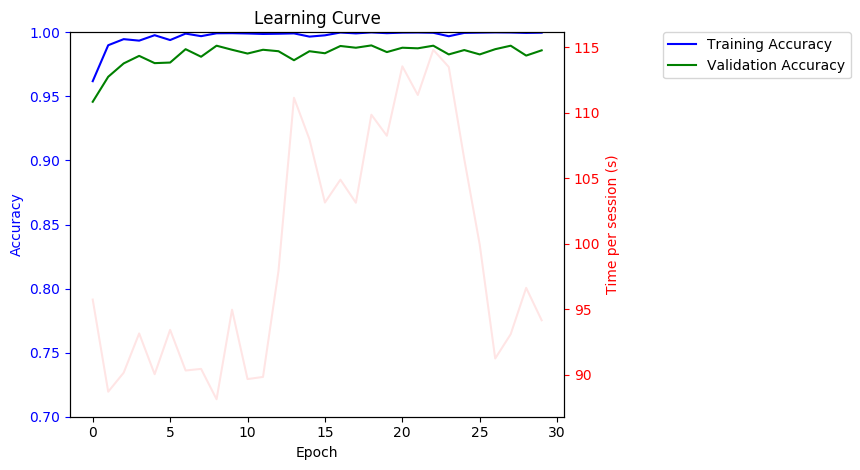

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)

training_plot, = ax1.plot(training_accuracy_list, 'b-')
validation_plot, = ax1.plot(validation_accuracy_list, 'g-')
ax1.set_xlabel('Epoch')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params('y', colors='b')
plt.ylim([0.7,1])

ax2 = ax1.twinx()
time_plot = ax2.plot(sess_times, 'r-', alpha=0.1)
ax2.set_ylabel('Time per session (s)', color='r')
ax2.tick_params('y', colors='r')
#plt.ylim([0.8,1])


#plt.figure(figsize=(8,6))
plt.title('Learning Curve')
#plt.plot(training_accuracy_list)
#plt.plot(validation_accuracy_list)
#plt.plot(sess_times)

plt.legend([training_plot, validation_plot], ['Training Accuracy','Validation Accuracy'], bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('plots/learning_curve.png')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch');
plt.show()

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [23]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\traffic-net
Test Accuracy = 0.968


---

## Step 3: Test a Model on New Images

To get more insight into how my models are working, I've download at more pictures of German traffic signs from the web and then used the model to predict the traffic sign type.


### Load and Output the Images

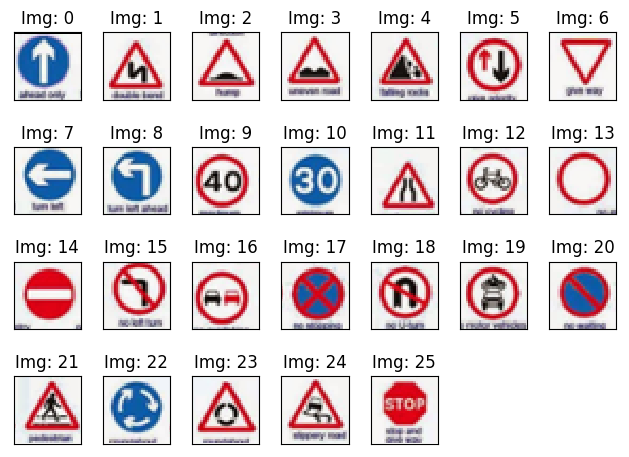

In [24]:
### Load the images and plot them here.
### source: https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder

### TODO: Lets get some more images which are real - not icons

import matplotlib.pyplot as plt
import cv2
import os
import re


def load_images_from_folder(folder):
    images = []
    labels = []
    regex = re.compile(r'\d+')
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        label = [int(x) for x in regex.findall(filename)]
        
        if img is not None:
            if img is not None:
                images.append(img)
                labels.append(label)
    return images, labels

path = "examples/online_images/new"

# your images in an array
X_online_bgr, y_online_labels = load_images_from_folder(path)
#local_labels = [i.partition("-")[0] for i in local_files]
#print(y_online_labels)
#print(X_online_bgr[0].shape)
#print(len(X_online_bgr))

no_imgs = len(X_online_bgr)
    
fig = plt.figure()
for j in range(no_imgs):
    ax = fig.add_subplot(4, 7, j+1)
    img = X_online_bgr[j]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title('Img: ' +str(j))
    ax.imshow(img)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.tight_layout()

### Preprocess images

In [25]:
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

print('Preprocessing new validation data...')
# Convert test images to gray scale
X_online = preprocess(np.array(X_online_bgr))
X_online = X_online[..., newaxis]
#image = X_valid2[index].squeeze()
print("Processed testing data shape =", X_online.shape)
print('Finished preprocessing new validation data.')



Preprocessing new validation data...
Processed testing data shape = (26, 32, 32, 1)
Finished preprocessing new validation data.


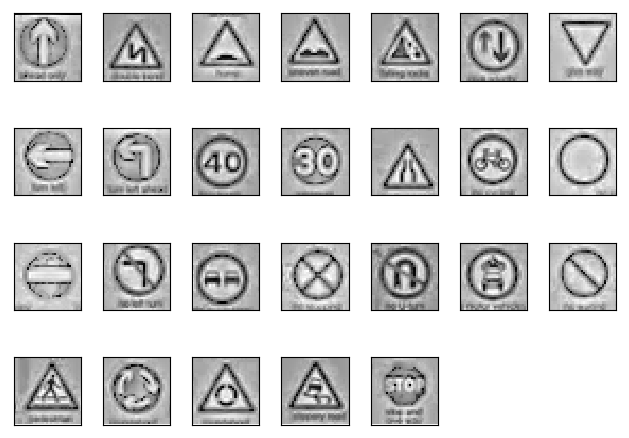

In [26]:
no_imgs = len(X_online)
i = 0

fig = plt.figure()
for j in range(X_online.shape[0]):
    ax = fig.add_subplot(4, 7, j+1)
    ax.imshow(X_online[j].squeeze(), cmap = 'gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.tight_layout()


### Predict the Sign Type for Each Image and Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) proves helpful here. 

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.


In [27]:
### Run the predictions here and use the model to output the prediction for each image.
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmax = tf.nn.softmax(logits)
    top_k_predictions = sess.run(tf.nn.top_k(softmax,k=5), feed_dict={x: X_online, keep_prob_conv:1.0, keep_prob: 1.0})

INFO:tensorflow:Restoring parameters from .\traffic-net


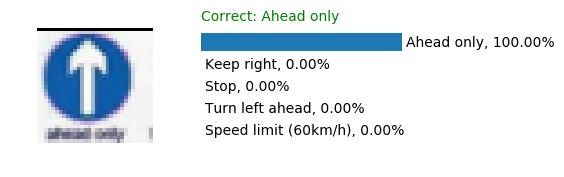

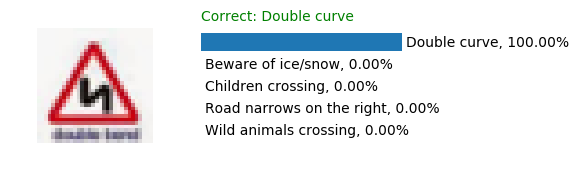

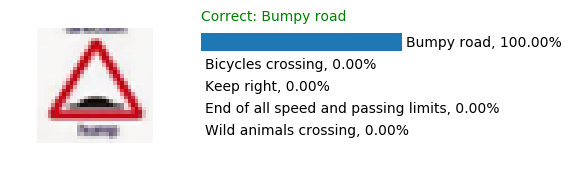

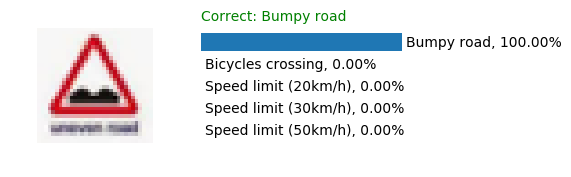

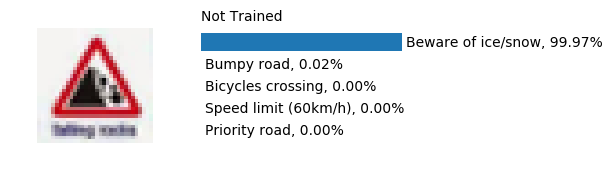

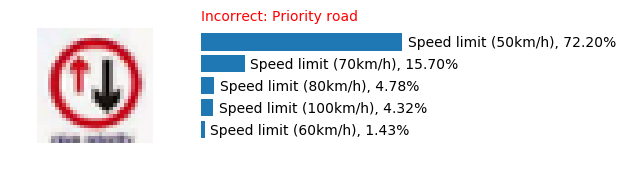

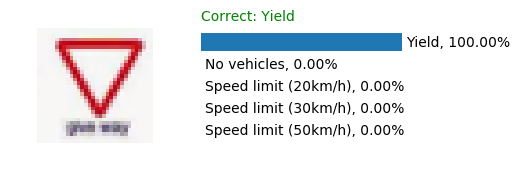

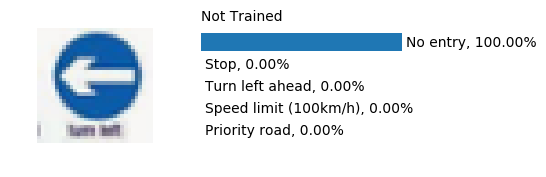

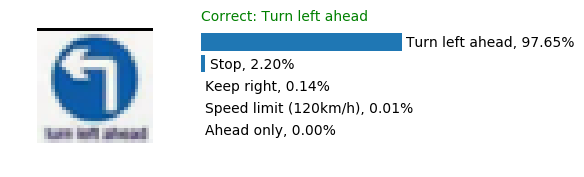

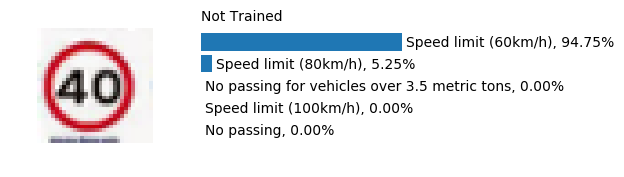

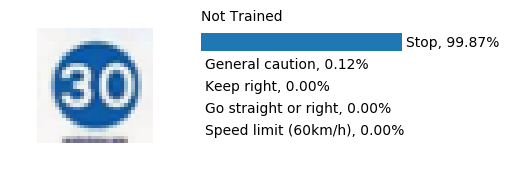

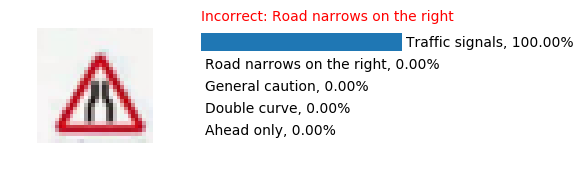

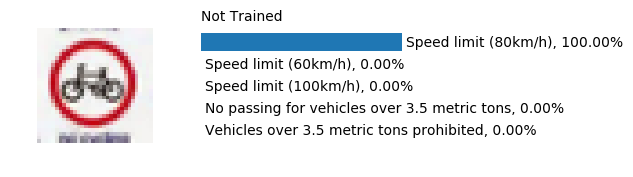

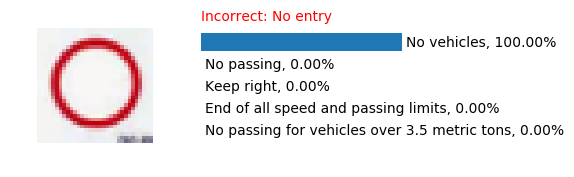

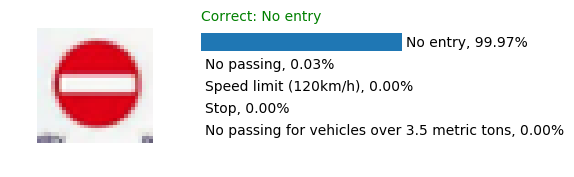

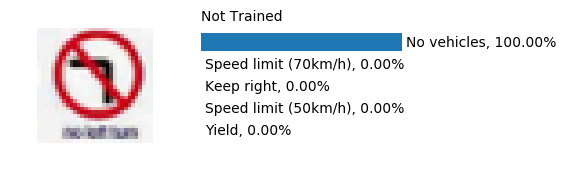

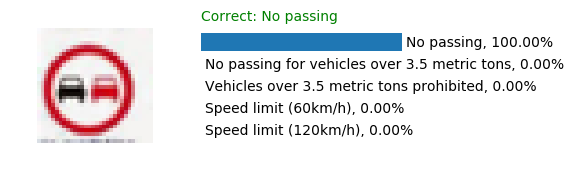

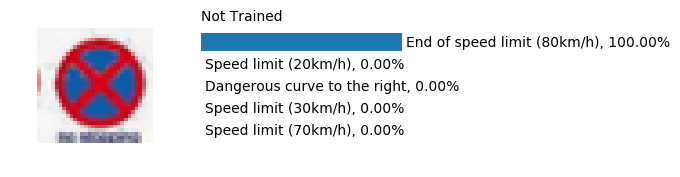

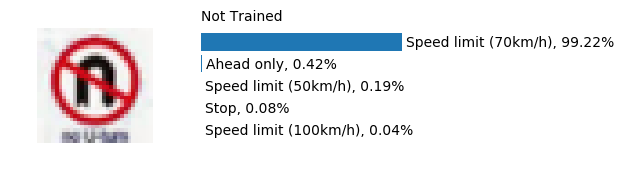

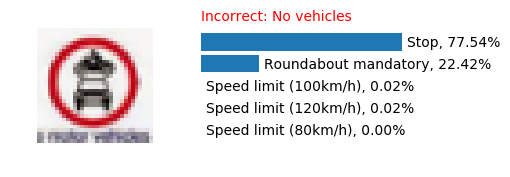

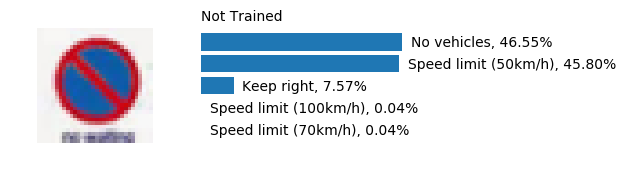

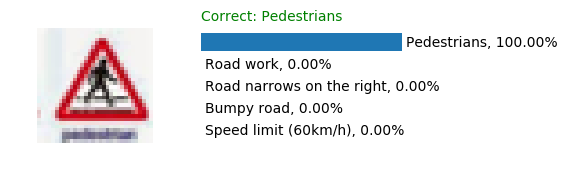

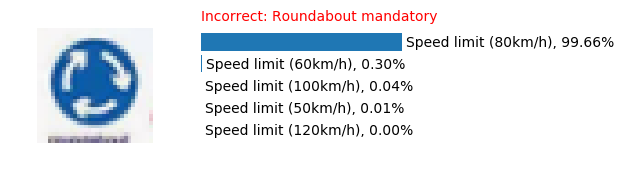

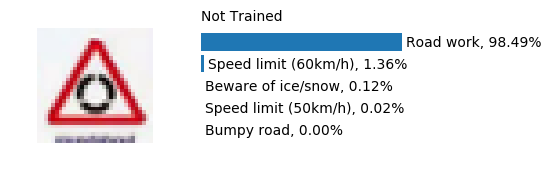

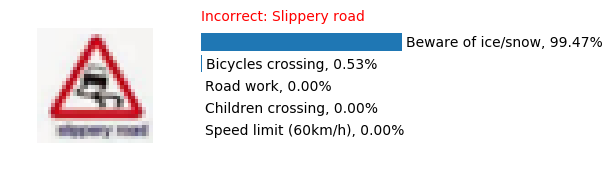

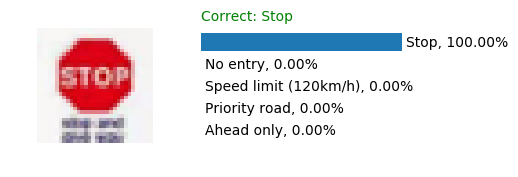

In [28]:
from matplotlib import gridspec
np.set_printoptions(suppress=True)
np.set_printoptions(precision=1)

no_nan = 0
no_right = 0
no_wrong = 0
wrong_x_list = [] 
wrong_prediction_list = []

for i in range(len(y_online_labels)):
    probabilities = top_k_predictions[0]
    top_k_labels = top_k_predictions[1]
    
    plt.figure(figsize = (5,1.5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
    plt.subplot(gs[0])
    
    img = X_online_bgr[int(i)]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    plt.axis('off')
    plt.subplot(gs[1])
    plt.barh(6-np.arange(5),top_k_predictions[0][int(i)], align='center')
    
    for i_label in range(5):
        plt.text(top_k_predictions[0][int(i)][i_label]+.02,6-i_label-.25, signnames[top_k_labels[int(i)][int(i_label)]] + ", {:.2f}".format(top_k_predictions[0][int(i)][int(i_label)]*100)+'%')
    plt.axis('off')
    if (y_online_labels[i] == [99]):
        plt.text(0,6.95, 'Not Trained')
        no_nan +=1
    elif (y_online_labels[i] == top_k_labels[i][0]):
        plt.text(0,6.95, "Correct: "+signnames[y_online_labels[int(i)][0]], color='green')
        no_right +=1
    else:
        plt.text(0,6.95, "Incorrect: "+signnames[y_online_labels[int(i)][0]], color='red') #signnames[y_train[int(i)]]);
        no_wrong +=1
        wrong_x_list = np.append(wrong_x_list,i)
        wrong_prediction_list = np.append(wrong_prediction_list,top_k_labels[i][0])
        
    plt.show()
    

### Analyze Performance

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print(no_wrong," incorrect predictions, ",no_right,"correct predictions and ", no_nan,"predictions not learnt")
print("{0:.2f}%".format(no_right/(no_right+no_wrong)*100),"% accuracy")

6  incorrect predictions,  10 correct predictions and  10 predictions not learnt
62.50% % accuracy


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

import math

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    # Run Prediction
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(6,6))
    plt_size = math.ceil( math.sqrt( float(featuremaps) ) )
    #print("plt size=", plt_size)
    for featuremap in range(featuremaps):
        plt.subplot(plt_size,plt_size, featuremap+1) # sets the number of feature maps to show on each row and column
        #plt.title('F.M. ' + str(featuremap), fontsize=8) # displays the feature map number
        plt.axis('off')
        #plt.set_aspect('equal')
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()
  

Loading model...
INFO:tensorflow:Restoring parameters from .\traffic-net
Model loaded.

Yield


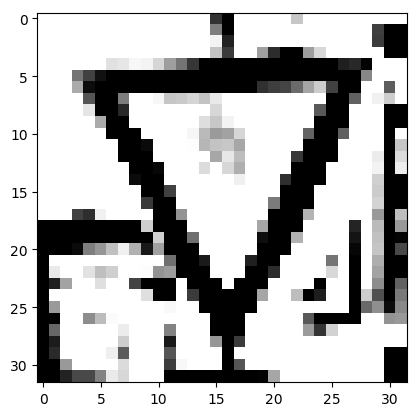

Feature Map for Activation Layer 1


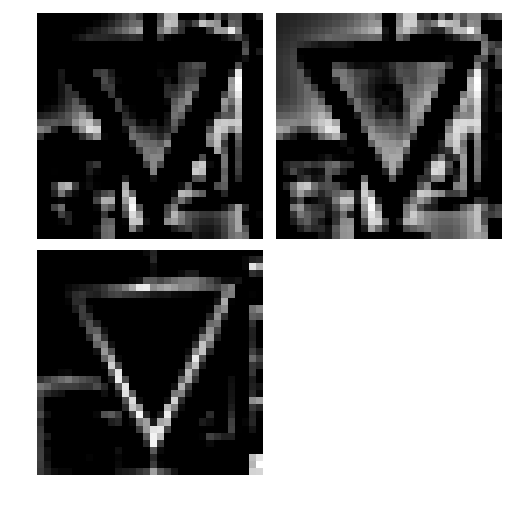

Feature Map for Activation Layer 2


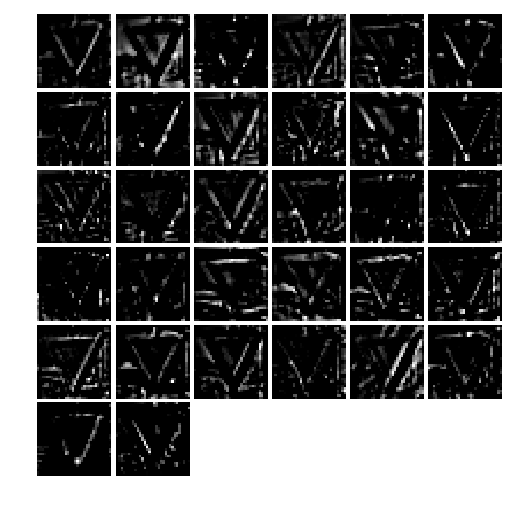

Feature Map for Activation Layer 3


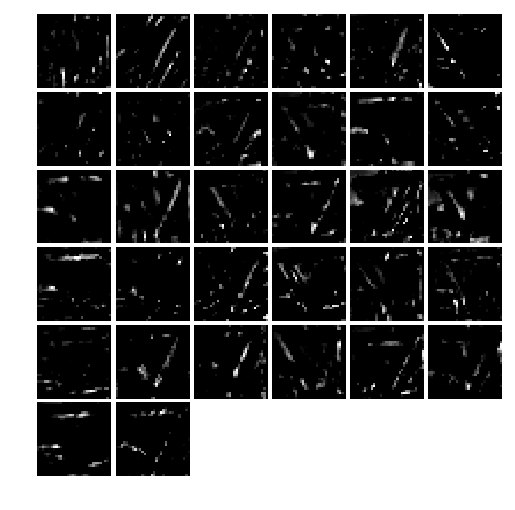

Feature Map for Activation Layer 4


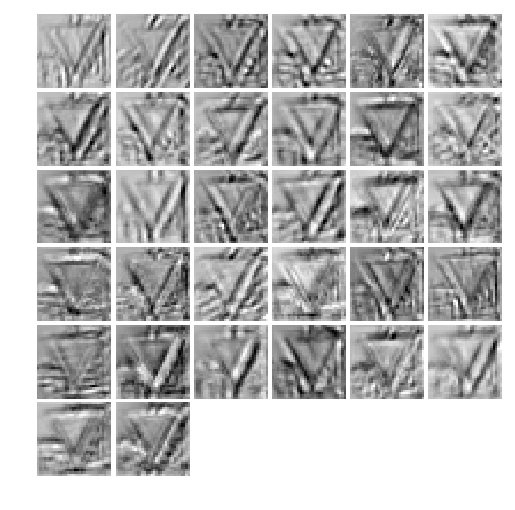

Feature Map for Activation Layer 5


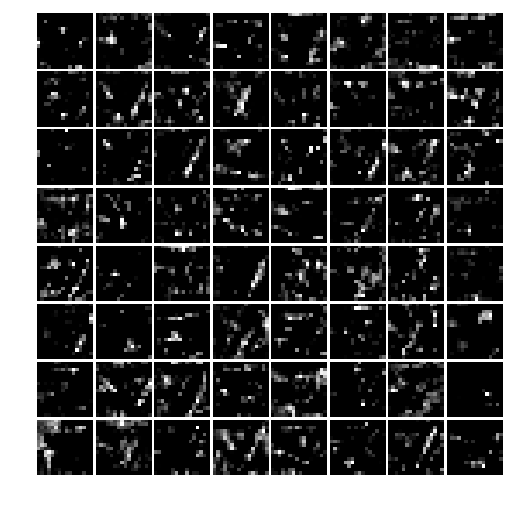

Feature Map for Activation Layer 6


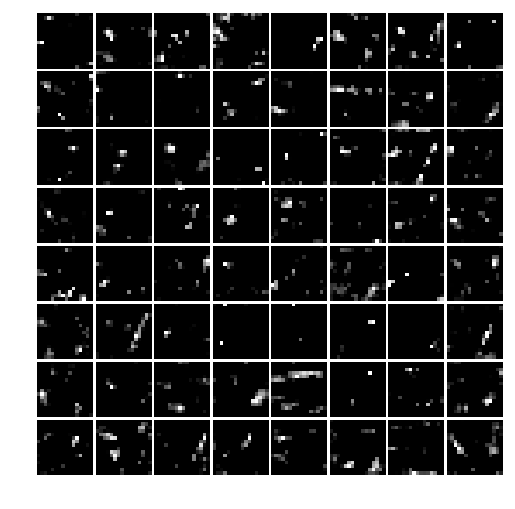

Feature Map for Activation Layer 7


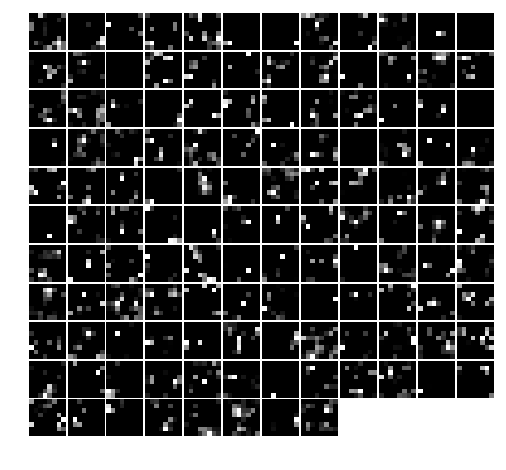

Feature Map for Activation Layer 8


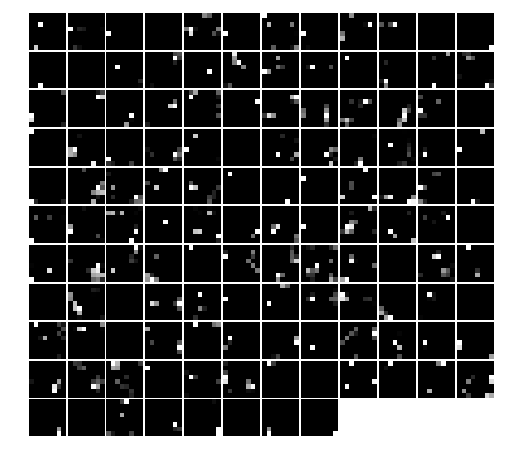

In [31]:
import random

print("Loading model...")
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Model loaded.")

    print()
    index = random.randint(0, len(X_train))
    print(signnames[y_train[index]])
    plt.imshow(np.squeeze(X_train[index], axis=2), cmap='gray', vmin=-1, vmax=1)
    plt.show()
    img = X_train[index]
    img = np.expand_dims(img, axis=0)
    print("Feature Map for Activation Layer 1")
    outputFeatureMap(img, conv1_activation)
    print("Feature Map for Activation Layer 2")
    outputFeatureMap(img, conv2_activation)
    print("Feature Map for Activation Layer 3")
    outputFeatureMap(img, conv3_activation)
    print("Feature Map for Activation Layer 4")
    outputFeatureMap(img, conv4_activation)
    print("Feature Map for Activation Layer 5")
    outputFeatureMap(img, conv5_activation)
    print("Feature Map for Activation Layer 6")
    outputFeatureMap(img, conv6_activation)
    print("Feature Map for Activation Layer 7")
    outputFeatureMap(img, conv7_activation)
    print("Feature Map for Activation Layer 8")
    outputFeatureMap(img, conv8_activation)

## Filter Visualisation
Here's some thing interesting I should look into
Tensorflow: visualize convolutional filters (conv1) in Cifar10 model
https://gist.github.com/kukuruza/03731dc494603ceab0c5
